In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/yolo_projects


archaeological-yolo.v2i.yolov8


In [3]:
!ls /content/drive/MyDrive/yolo_projects/archaeological-yolo.v2i.yolov8


data.yaml  README.dataset.txt  README.roboflow.txt  train  valid


In [4]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.3 MB/s eta 0:00:00


In [7]:
from pathlib import Path

DATASET_PATH = "/content/drive/MyDrive/yolo_projects/archaeological-yolo.v2i.yolov8"

print("Path exists:", Path(DATASET_PATH).exists())
print("\nContents:")
!ls /content/drive/MyDrive/yolo_projects/archaeological-yolo.v2i.yolov8



Path exists: True

Contents:
data.yaml  README.dataset.txt  README.roboflow.txt  train  valid


In [8]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="/content/drive/MyDrive/yolo_projects/archaeological-yolo.v2i.yolov8/data.yaml",
    epochs=50,
    imgsz=640,
    batch=8
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/yolo_projects/archaeological-yolo.v2i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hs

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7880f9b8aa80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [9]:
import os
import shutil

os.makedirs("/content/drive/MyDrive/yolo_saved_models", exist_ok=True)

shutil.copy(
    "/content/runs/detect/train/weights/best.pt",
    "/content/drive/MyDrive/yolo_saved_models/archaeological_yolo_best.pt"
)

print("✅ Trained YOLO model saved permanently")


✅ Trained YOLO model saved permanently


In [10]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/yolo_saved_models/archaeological_yolo_best.pt")

model.predict(
    source="/content/drive/MyDrive/yolo_projects/archaeological-yolo.v2i.yolov8/valid/images",
    imgsz=640,
    conf=0.25,
    save=True
)



image 1/4 /content/drive/MyDrive/yolo_projects/archaeological-yolo.v2i.yolov8/valid/images/22978945_15_png.rf.cbcc49afffe56d2cca742e6cb4c05048.jpg: 640x640 1 structure_piece, 274.9ms
image 2/4 /content/drive/MyDrive/yolo_projects/archaeological-yolo.v2i.yolov8/valid/images/23429155_15_png.rf.a5991b41889f3689216cf33c7e049a3c.jpg: 640x640 (no detections), 228.5ms
image 3/4 /content/drive/MyDrive/yolo_projects/archaeological-yolo.v2i.yolov8/valid/images/23579050_15_png.rf.8a64f51f2fedae26e8c49de609db1c33.jpg: 640x640 (no detections), 310.6ms
image 4/4 /content/drive/MyDrive/yolo_projects/archaeological-yolo.v2i.yolov8/valid/images/23728930_15_png.rf.7a088e87df8aa78925bed433da71b030.jpg: 640x640 (no detections), 539.1ms
Speed: 5.6ms preprocess, 338.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'structure_piece'}
 obb: None
 orig_img: array([[[109, 118, 121],
         [ 88, 100, 102],
         [ 30,  42,  44],
         ...,
         [107, 114, 117],
         [113, 122, 125],
         [ 98, 107, 110]],
 
        [[114, 123, 126],
         [ 52,  64,  66],
         [ 18,  31,  33],
         ...,
         [105, 112, 115],
         [112, 121, 124],
         [106, 115, 118]],
 
        [[ 88, 100, 102],
         [ 23,  35,  37],
         [ 29,  42,  44],
         ...,
         [106, 114, 114],
         [108, 118, 118],
         [110, 120, 120]],
 
        ...,
 
        [[ 65,  78,  76],
         [ 26,  39,  37],
         [ 19,  32,  30],
         ...,
         [ 44,  57,  59],
         [ 41,  56,  58],
         [ 23,  38,  40]],
 
        [[ 66,  79,  77],
         [ 44,  57,  55],
         [ 37,  48,  46],
         ...,
         

In [11]:
import os

os.listdir("/content/runs/detect/predict")


['23728930_15_png.rf.7a088e87df8aa78925bed433da71b030.jpg',
 '23579050_15_png.rf.8a64f51f2fedae26e8c49de609db1c33.jpg',
 '22978945_15_png.rf.cbcc49afffe56d2cca742e6cb4c05048.jpg',
 '23429155_15_png.rf.a5991b41889f3689216cf33c7e049a3c.jpg']

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

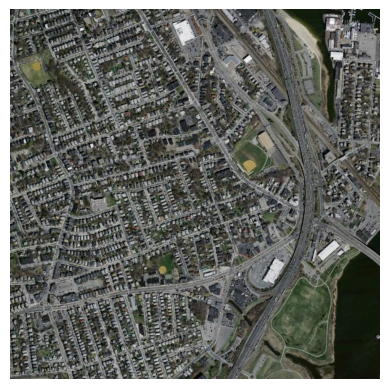

In [12]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/content/runs/detect/predict/23728930_15_png.rf.7a088e87df8aa78925bed433da71b030.jpg")
plt.imshow(img)
plt.axis("off")


In [14]:
import shutil
import os
os.makedirs("/content/drive/MyDrive/yolo_models", exist_ok=True)

shutil.copy(
    "/content/runs/detect/train/weights/best.pt",
    "/content/drive/MyDrive/yolo_models/archaeological_yolo_best.pt"
)

print("✅ Model saved permanently to Google Drive")


✅ Model saved permanently to Google Drive


In [15]:
from ultralytics import YOLO

# Load your trained model (no training)
model = YOLO("/content/drive/MyDrive/yolo_models/archaeological_yolo_best.pt")

print("✅ Trained model loaded successfully")


✅ Trained model loaded successfully


In [16]:
model.predict(
    source="/content/drive/MyDrive/yolo_projects/archaeological-yolo.v2i.yolov8/valid/images",
    conf=0.25,
    save=True
)



image 1/4 /content/drive/MyDrive/yolo_projects/archaeological-yolo.v2i.yolov8/valid/images/22978945_15_png.rf.cbcc49afffe56d2cca742e6cb4c05048.jpg: 640x640 1 structure_piece, 283.6ms
image 2/4 /content/drive/MyDrive/yolo_projects/archaeological-yolo.v2i.yolov8/valid/images/23429155_15_png.rf.a5991b41889f3689216cf33c7e049a3c.jpg: 640x640 (no detections), 282.0ms
image 3/4 /content/drive/MyDrive/yolo_projects/archaeological-yolo.v2i.yolov8/valid/images/23579050_15_png.rf.8a64f51f2fedae26e8c49de609db1c33.jpg: 640x640 (no detections), 270.3ms
image 4/4 /content/drive/MyDrive/yolo_projects/archaeological-yolo.v2i.yolov8/valid/images/23728930_15_png.rf.7a088e87df8aa78925bed433da71b030.jpg: 640x640 (no detections), 239.9ms
Speed: 4.6ms preprocess, 268.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'structure_piece'}
 obb: None
 orig_img: array([[[109, 118, 121],
         [ 88, 100, 102],
         [ 30,  42,  44],
         ...,
         [107, 114, 117],
         [113, 122, 125],
         [ 98, 107, 110]],
 
        [[114, 123, 126],
         [ 52,  64,  66],
         [ 18,  31,  33],
         ...,
         [105, 112, 115],
         [112, 121, 124],
         [106, 115, 118]],
 
        [[ 88, 100, 102],
         [ 23,  35,  37],
         [ 29,  42,  44],
         ...,
         [106, 114, 114],
         [108, 118, 118],
         [110, 120, 120]],
 
        ...,
 
        [[ 65,  78,  76],
         [ 26,  39,  37],
         [ 19,  32,  30],
         ...,
         [ 44,  57,  59],
         [ 41,  56,  58],
         [ 23,  38,  40]],
 
        [[ 66,  79,  77],
         [ 44,  57,  55],
         [ 37,  48,  46],
         ...,
         